In [1]:
import pandas as pd
df = pd.read_csv("daily_average.csv")
grouped = df.groupby('location')
print(df.columns)
df_location_1 = df[df['location'] == 1]
print(len(df_location_1))



Index(['day', 'location', 'index', 'Unnamed: 0', 'hourly.temperature_2m',
       'hourly.relative_humidity_2m', 'hourly.dew_point_2m',
       'hourly.apparent_temperature', 'hourly.precipitation', 'hourly.rain',
       'hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code',
       'hourly.pressure_msl', 'hourly.surface_pressure', 'hourly.cloud_cover',
       'hourly.cloud_cover_low', 'hourly.cloud_cover_mid',
       'hourly.cloud_cover_high', 'hourly.et0_fao_evapotranspiration',
       'hourly.vapour_pressure_deficit', 'hourly.wind_speed_10m',
       'hourly.wind_speed_100m', 'hourly.wind_direction_10m',
       'hourly.wind_direction_100m', 'hourly.wind_gusts_10m',
       'hourly.soil_temperature_0_to_7cm', 'hourly.soil_temperature_7_to_28cm',
       'hourly.soil_temperature_28_to_100cm',
       'hourly.soil_temperature_100_to_255cm', 'hourly.soil_moisture_0_to_7cm',
       'hourly.soil_moisture_7_to_28cm', 'hourly.soil_moisture_28_to_100cm',
       'hourly.soil_moisture_100_to_

<Figure size 1000x500 with 0 Axes>

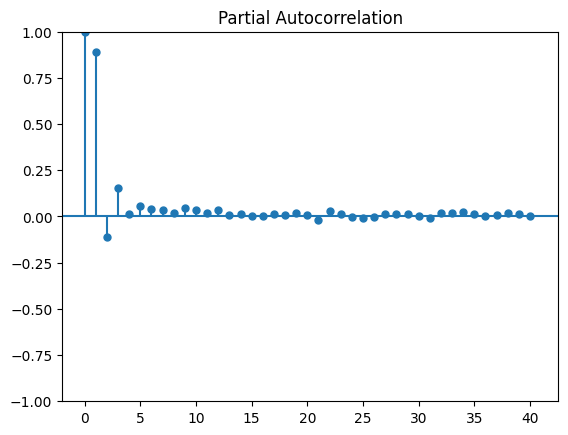

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("daily_average.csv")

time_series = df['fwix']

pacf = sm.tsa.pacf(time_series)

plt.figure(figsize=(10,5))
sm.graphics.tsa.plot_pacf(time_series, lags=40)
plt.show()

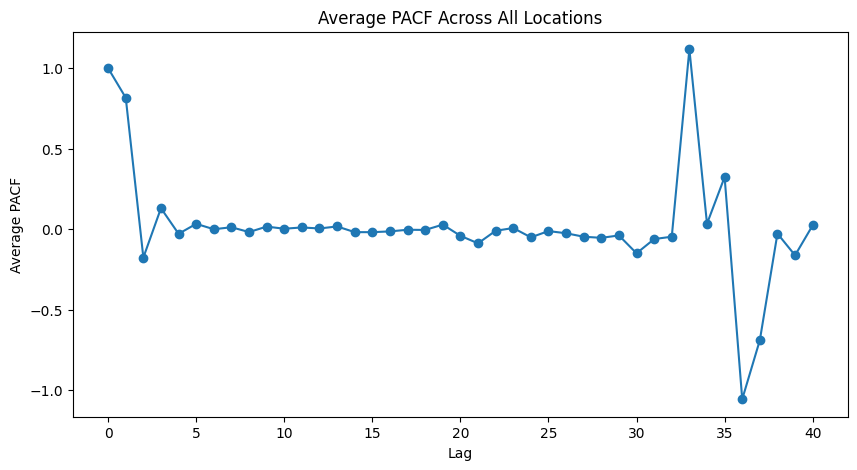

count    1770.000000
mean        2.566102
std         0.725365
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: AR_Order, dtype: float64


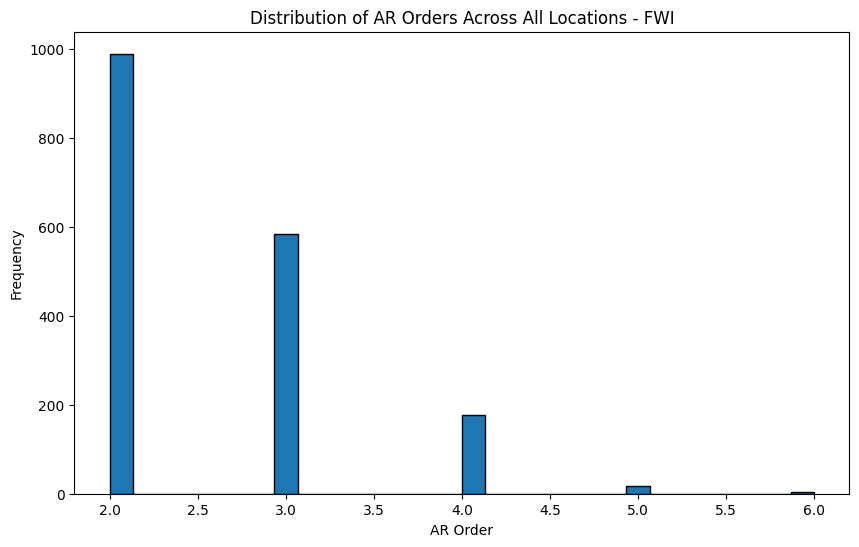

In [9]:
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("daily_average.csv")
grouped = df.groupby('location')

pacfs = []

for name, group in grouped:
    group = group.drop(['index.1', 'Unnamed: 0', 'location', 'index','hourly.is_day','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code', 'day'], axis=1)
    
    time_series = group['fwix']

    pacf = sm.tsa.pacf(time_series, nlags=30)

    pacfs.append(pacf)

average_pacf = np.mean(pacfs, axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(len(average_pacf)), average_pacf, marker='o')
plt.title('Average PACF Across All Locations')
plt.xlabel('Lag')
plt.ylabel('Average PACF')
plt.show()

<Figure size 1000x500 with 0 Axes>

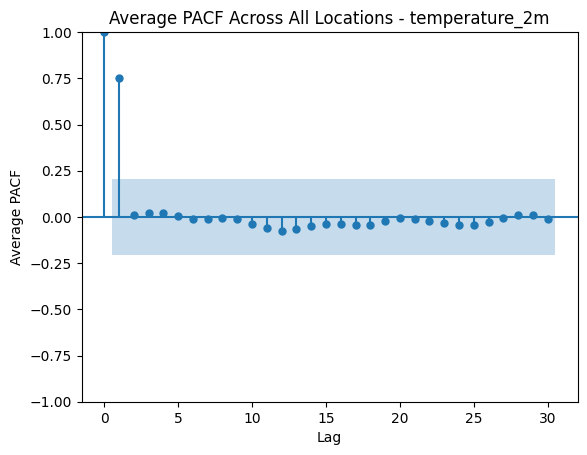

<Figure size 1000x500 with 0 Axes>

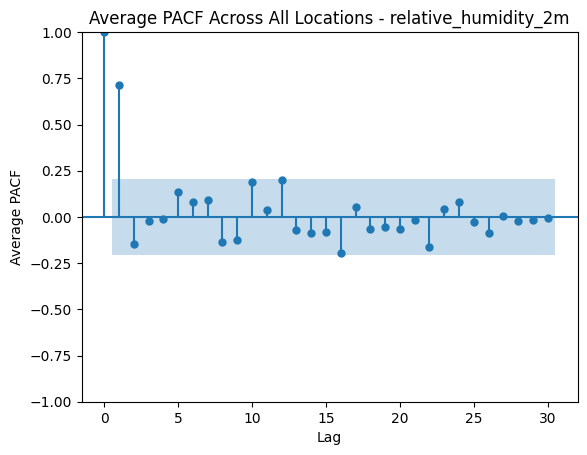

<Figure size 1000x500 with 0 Axes>

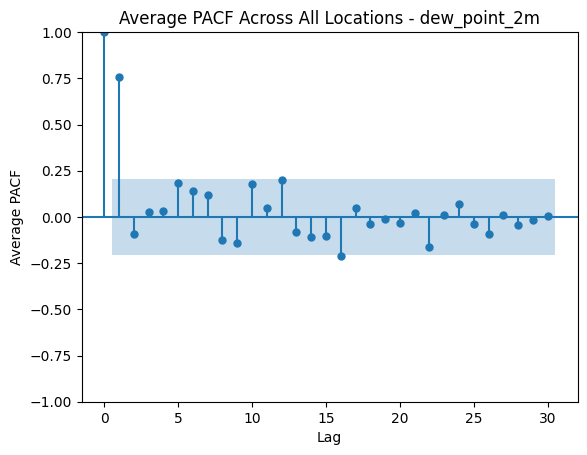

<Figure size 1000x500 with 0 Axes>

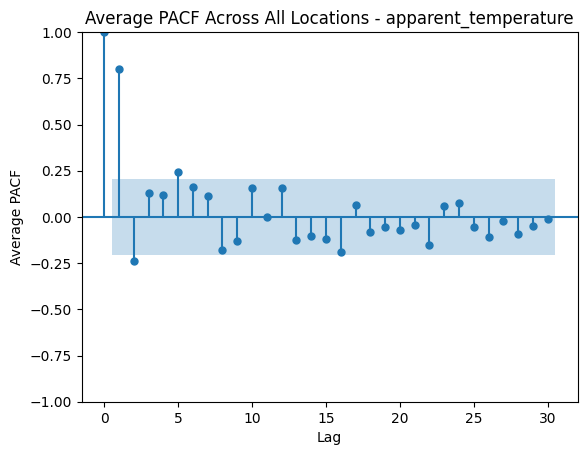

<Figure size 1000x500 with 0 Axes>

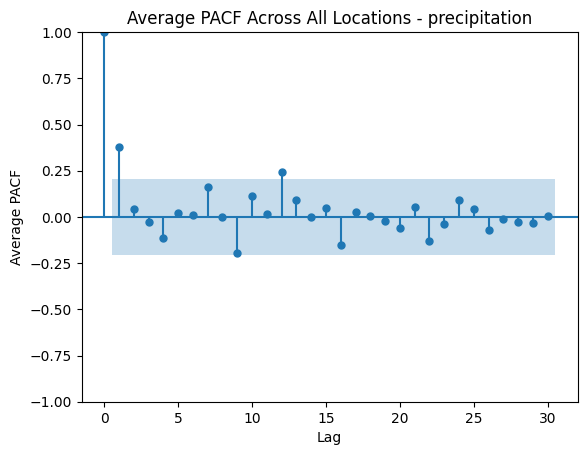

<Figure size 1000x500 with 0 Axes>

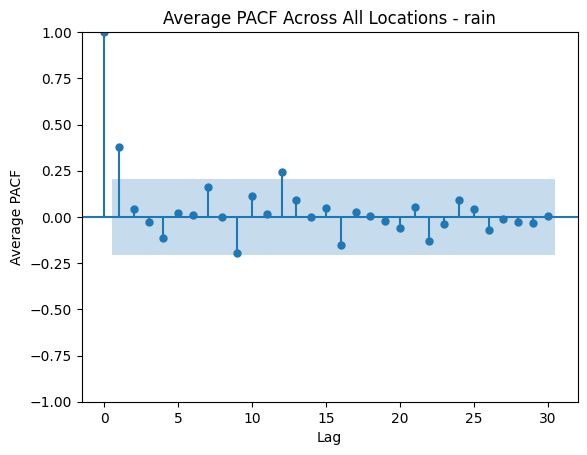

<Figure size 1000x500 with 0 Axes>

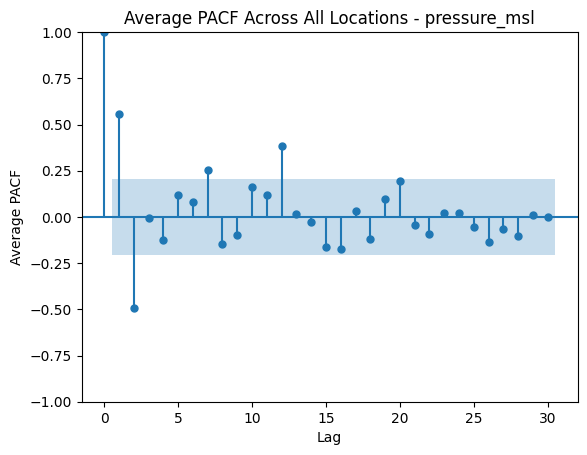

<Figure size 1000x500 with 0 Axes>

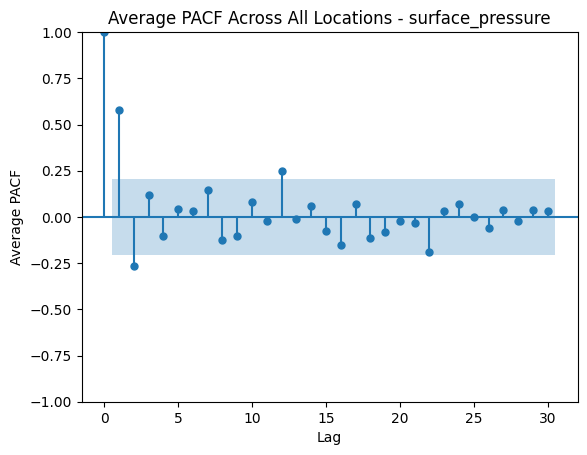

<Figure size 1000x500 with 0 Axes>

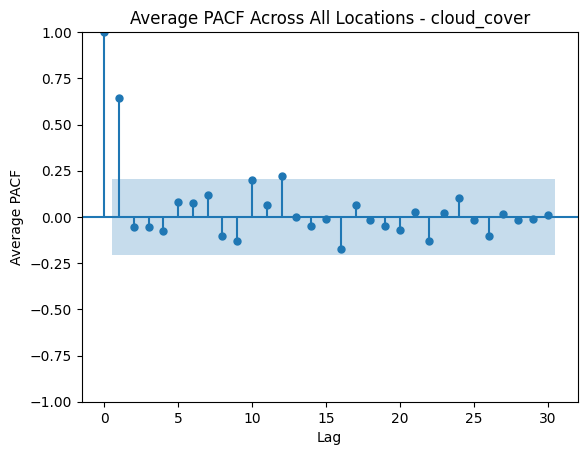

<Figure size 1000x500 with 0 Axes>

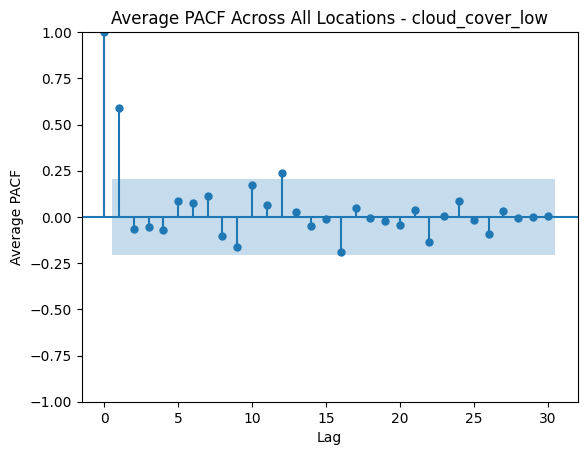

<Figure size 1000x500 with 0 Axes>

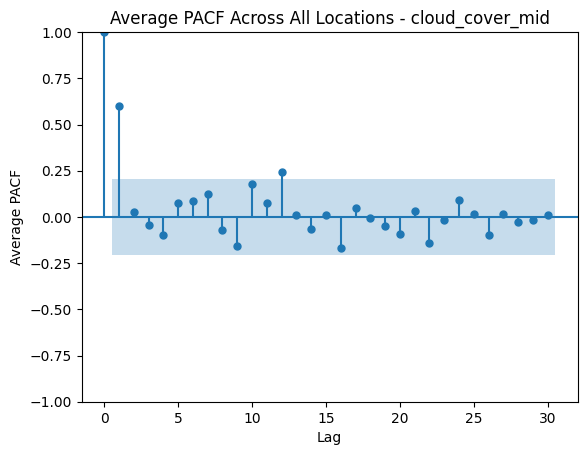

<Figure size 1000x500 with 0 Axes>

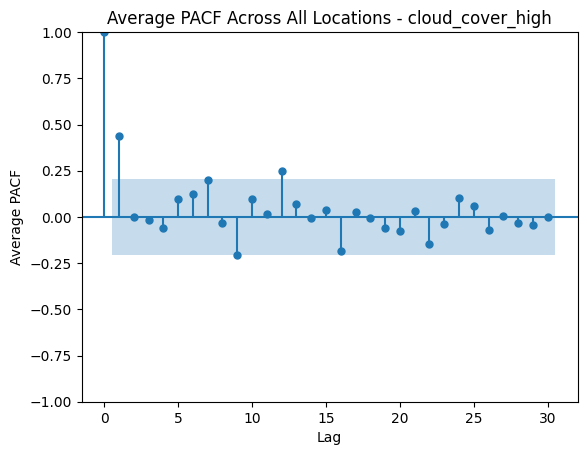

<Figure size 1000x500 with 0 Axes>

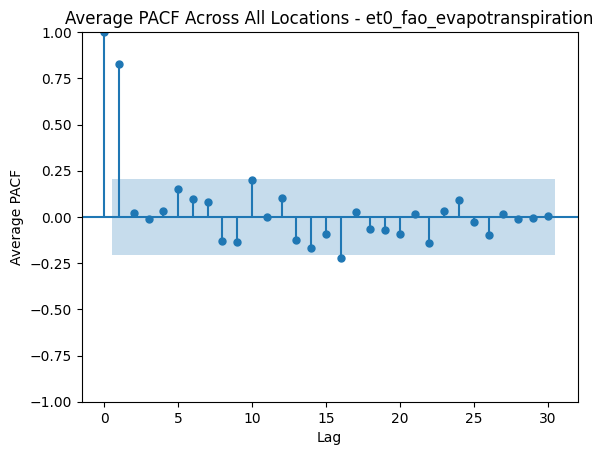

<Figure size 1000x500 with 0 Axes>

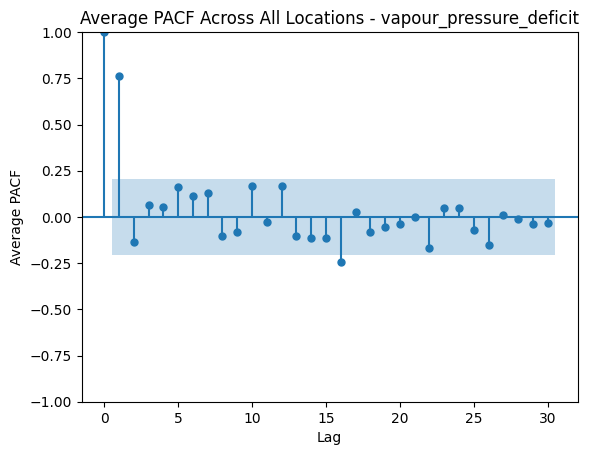

<Figure size 1000x500 with 0 Axes>

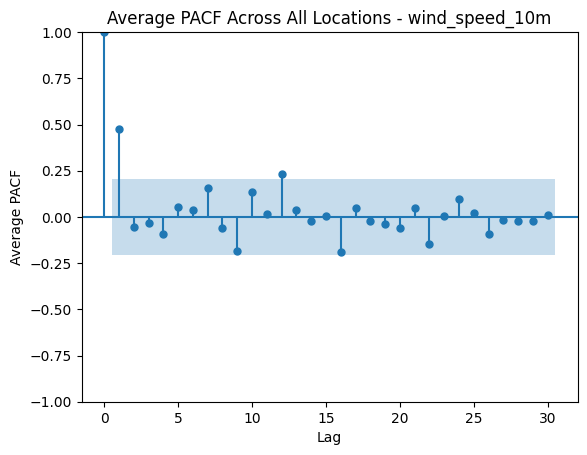

<Figure size 1000x500 with 0 Axes>

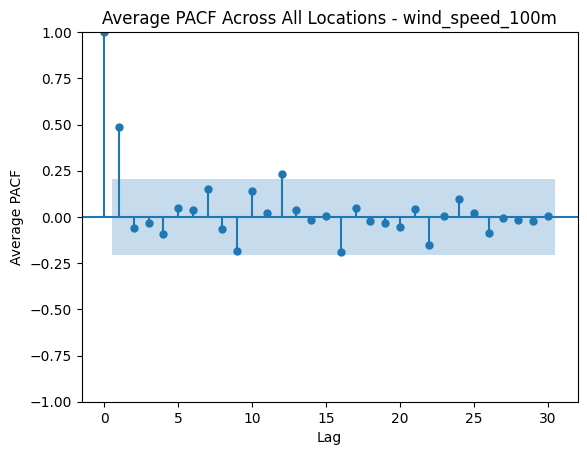

<Figure size 1000x500 with 0 Axes>

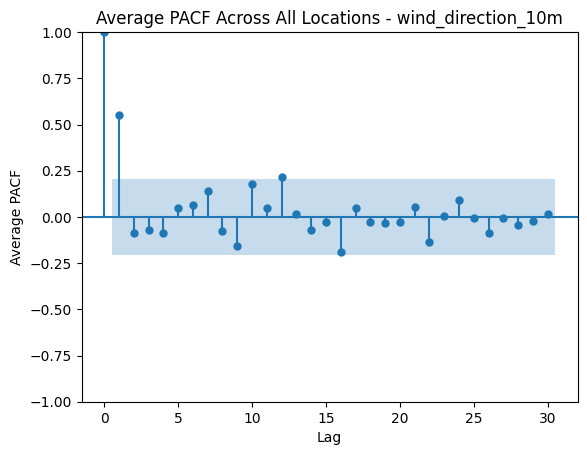

<Figure size 1000x500 with 0 Axes>

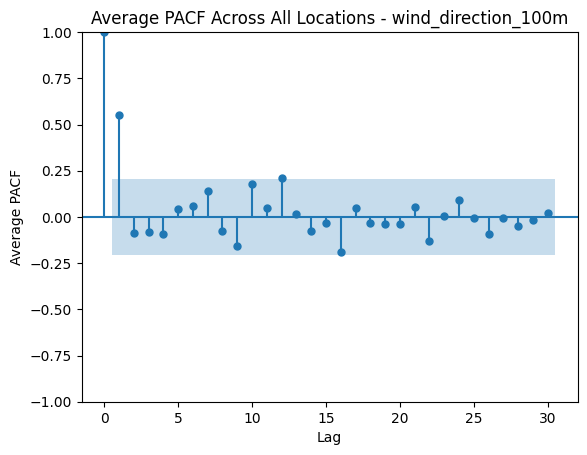

<Figure size 1000x500 with 0 Axes>

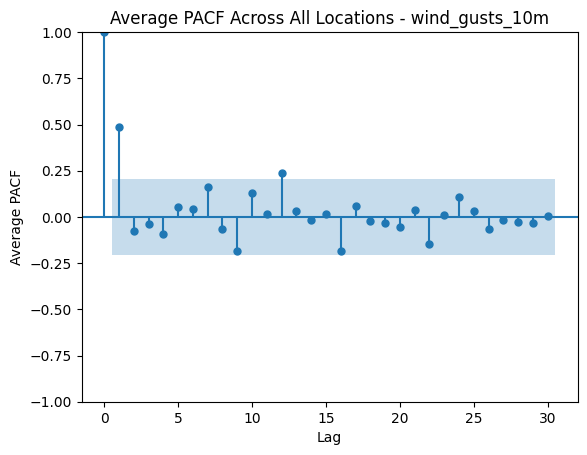

<Figure size 1000x500 with 0 Axes>

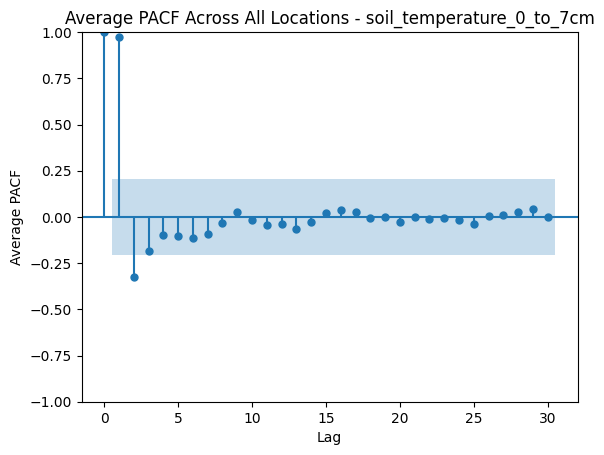

<Figure size 1000x500 with 0 Axes>

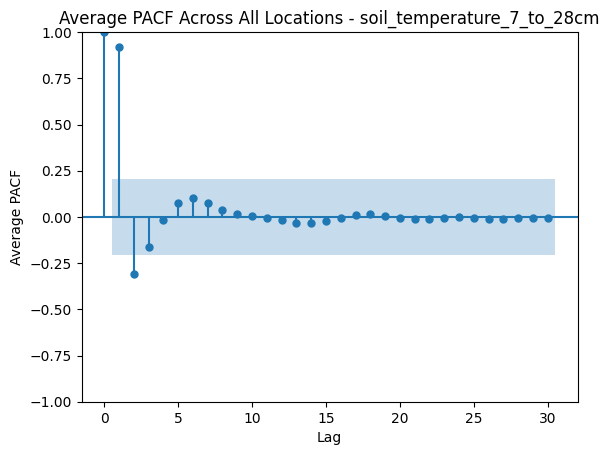

<Figure size 1000x500 with 0 Axes>

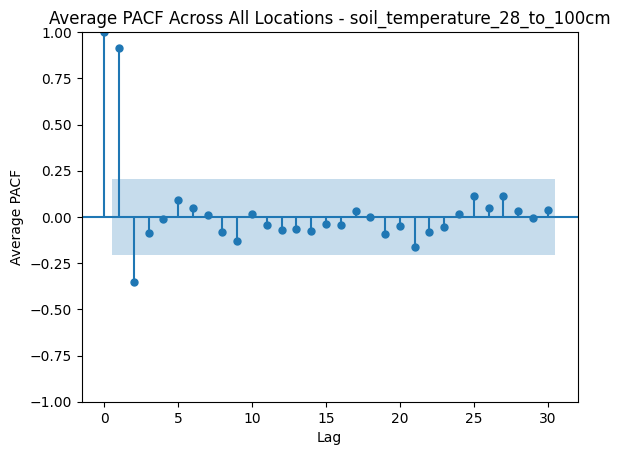

<Figure size 1000x500 with 0 Axes>

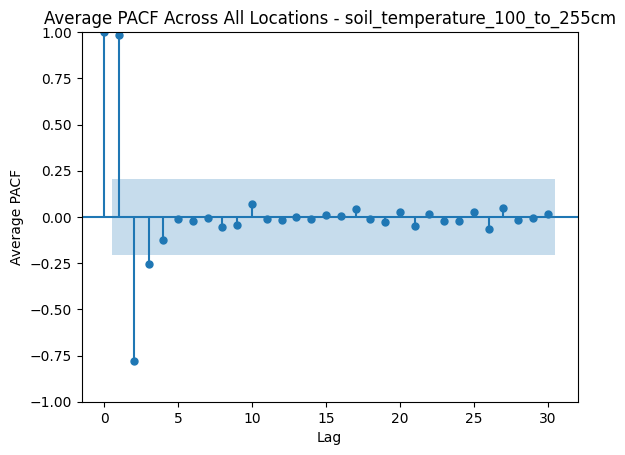

<Figure size 1000x500 with 0 Axes>

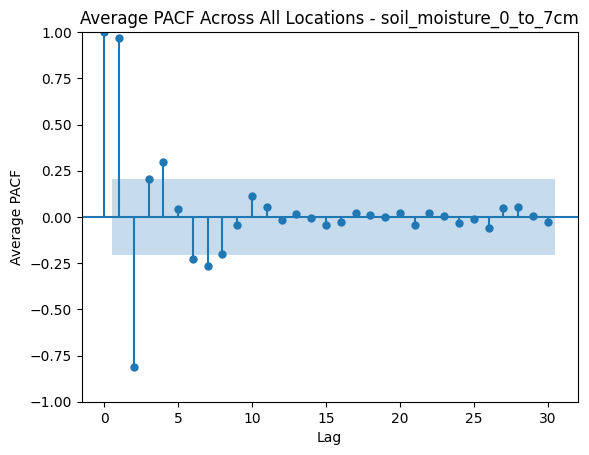

/home/ori/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1491: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


<Figure size 1000x500 with 0 Axes>

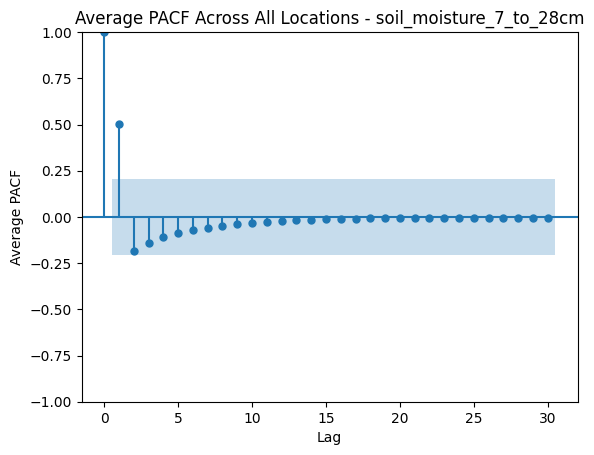

<Figure size 1000x500 with 0 Axes>

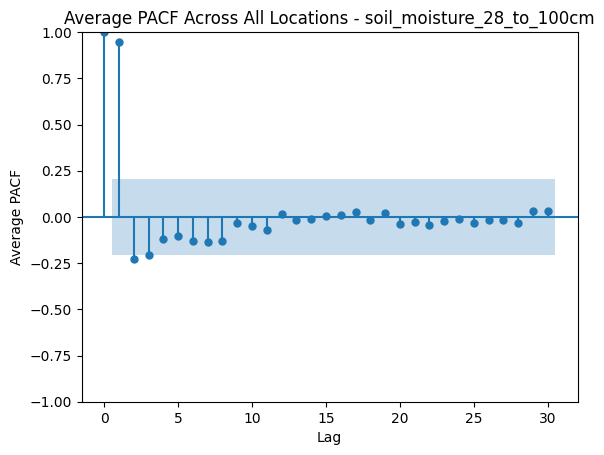

<Figure size 1000x500 with 0 Axes>

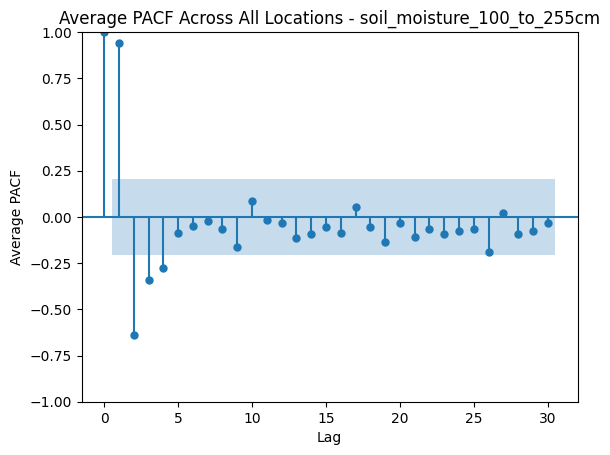

<Figure size 1000x500 with 0 Axes>

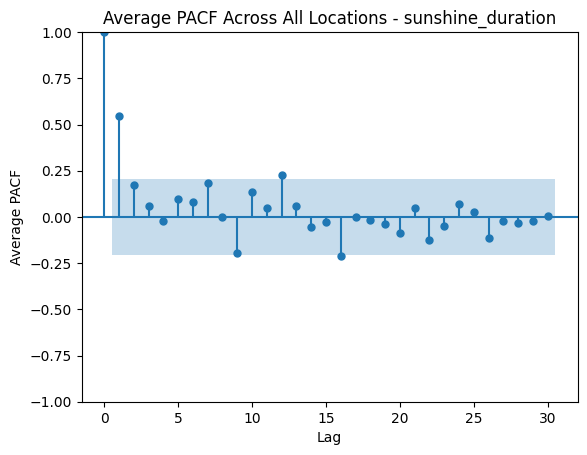

<Figure size 1000x500 with 0 Axes>

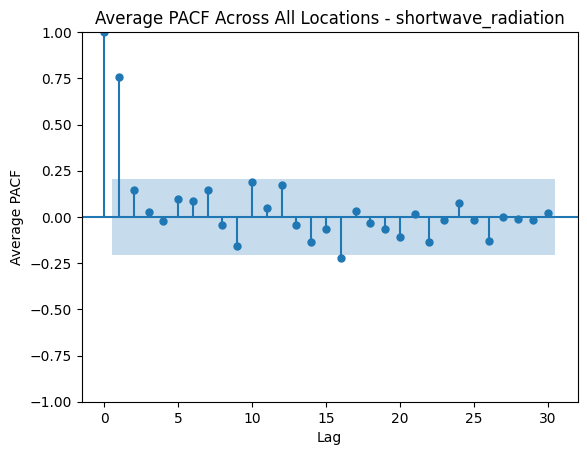

<Figure size 1000x500 with 0 Axes>

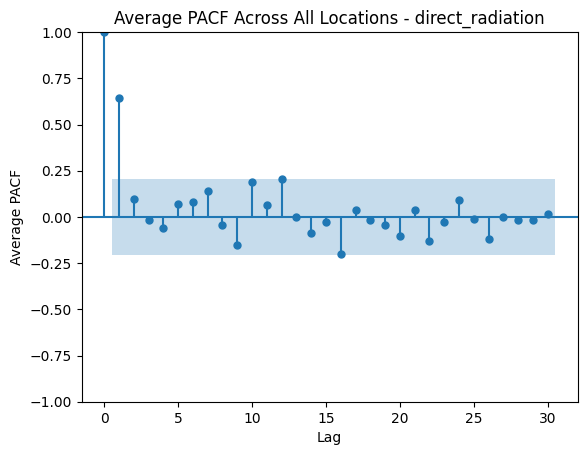

<Figure size 1000x500 with 0 Axes>

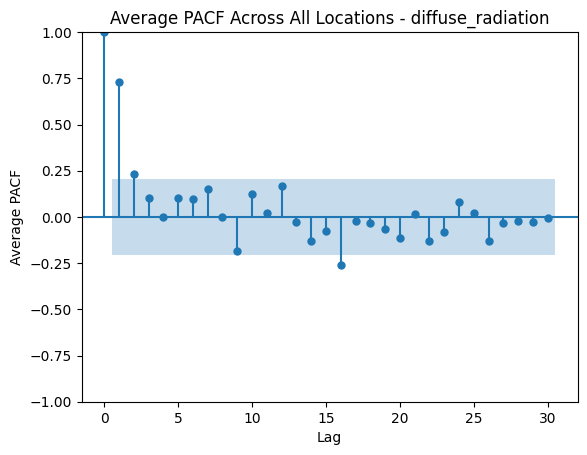

<Figure size 1000x500 with 0 Axes>

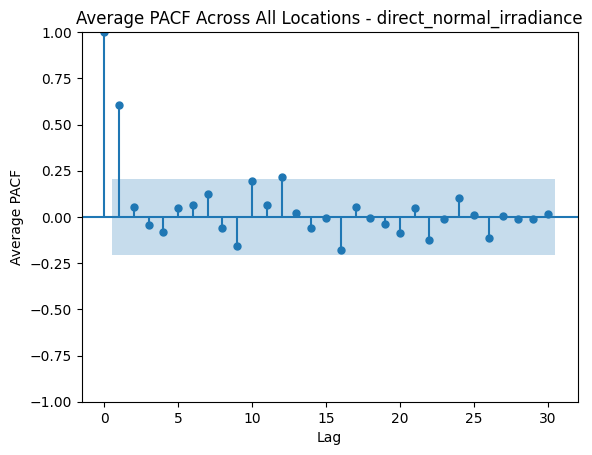

<Figure size 1000x500 with 0 Axes>

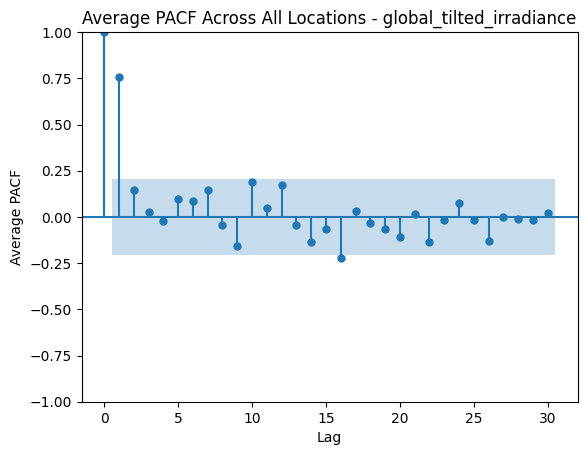

<Figure size 1000x500 with 0 Axes>

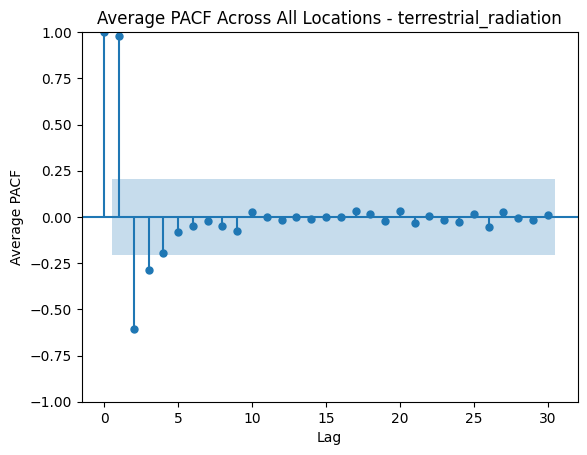

<Figure size 1000x500 with 0 Axes>

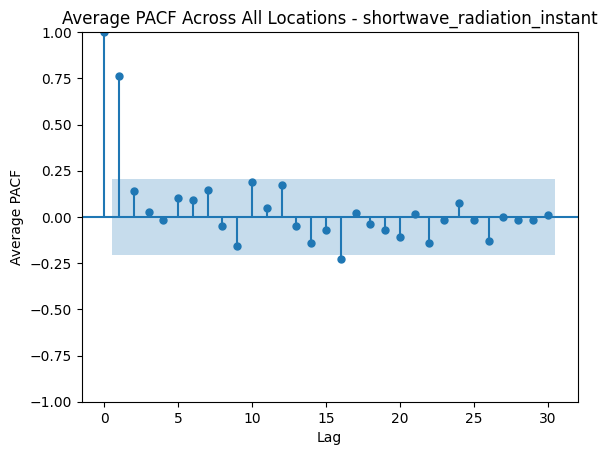

<Figure size 1000x500 with 0 Axes>

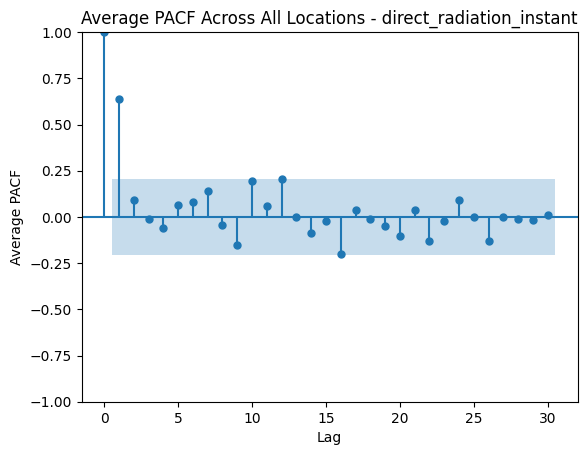

<Figure size 1000x500 with 0 Axes>

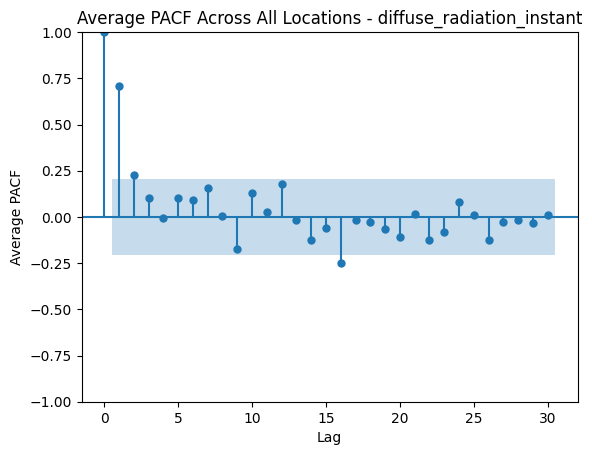

<Figure size 1000x500 with 0 Axes>

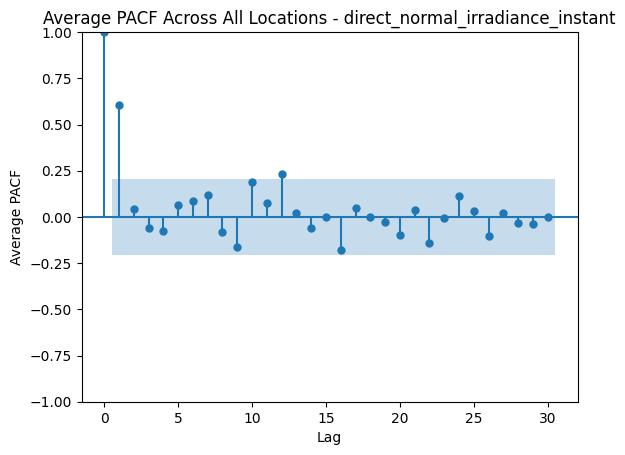

<Figure size 1000x500 with 0 Axes>

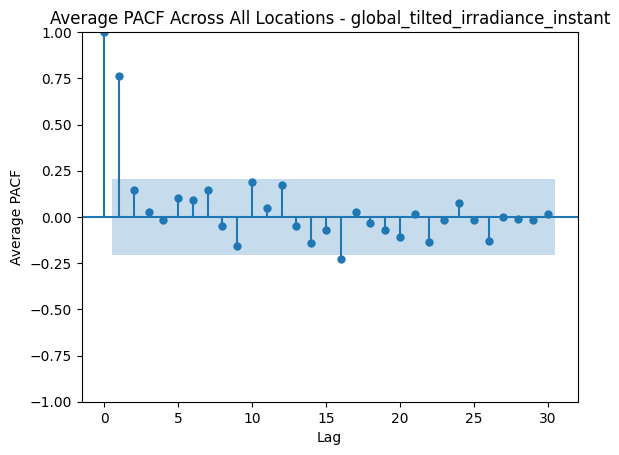

<Figure size 1000x500 with 0 Axes>

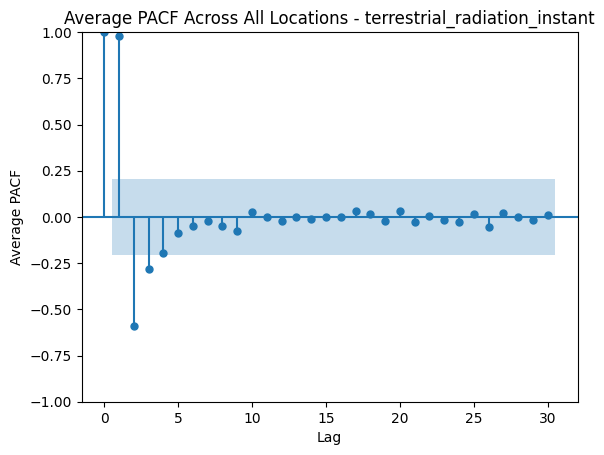

<Figure size 1000x500 with 0 Axes>

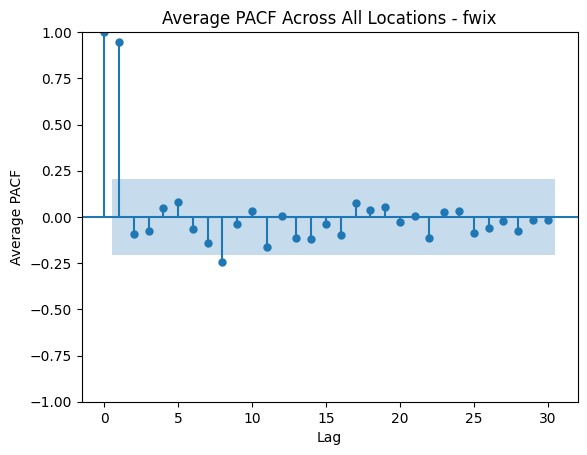

<Figure size 1000x500 with 0 Axes>

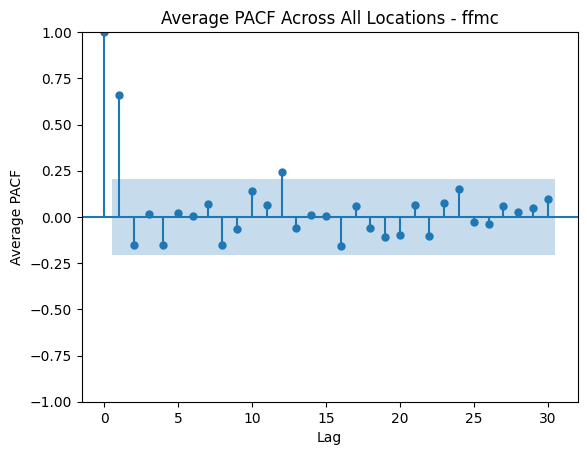

<Figure size 1000x500 with 0 Axes>

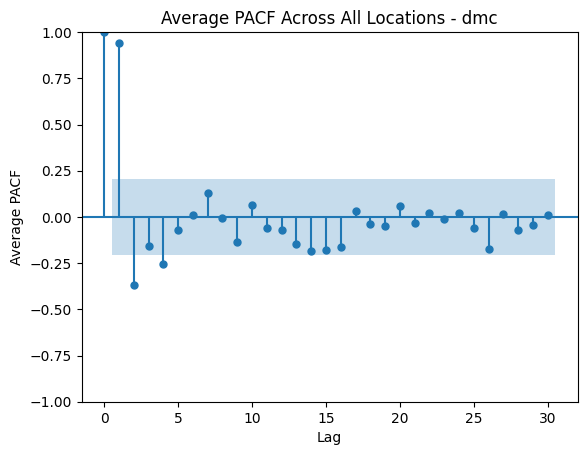

<Figure size 1000x500 with 0 Axes>

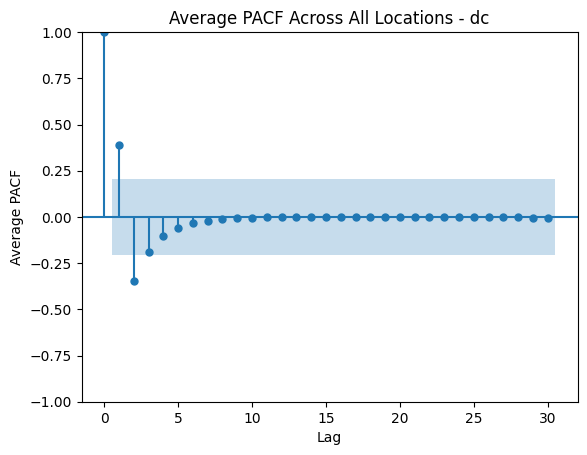

<Figure size 1000x500 with 0 Axes>

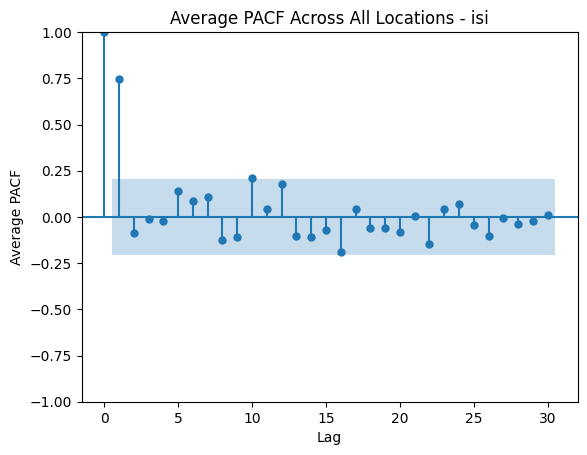

<Figure size 1000x500 with 0 Axes>

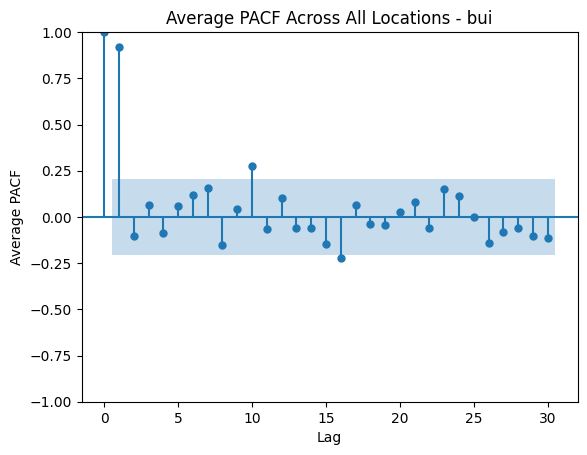

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample

df = pd.read_csv("daily_average.csv")
grouped = df.groupby('location')
df.drop(['index.1', 'Unnamed: 0', 'location', 'index','hourly.is_day','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code', 'day'], axis=1, inplace=True)

for c in df.columns:

    pacfs = []

    for name, group in grouped:
        #group = group.drop(['index.1', 'Unnamed: 0', 'location', 'index','hourly.is_day','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code', 'day'], axis=1)
        
        time_series = group[f'{c}']

        pacf = sm.tsa.pacf(time_series, nlags=30)

        pacfs.append(pacf)

    average_pacf = np.mean(pacfs, axis=0)

    np.random.seed(0)
    dummy_series = arma_generate_sample([1] + list(-average_pacf[1:]), [1], len(time_series))

    name = c.replace('hourly.', '')

    plt.figure(figsize=(10,5))
    sm.graphics.tsa.plot_pacf(dummy_series, lags=30)
    plt.title(f'Average PACF Across All Locations - {name}')
    plt.xlabel('Lag')
    plt.ylabel('Average PACF')
    plt.savefig(f'PACF/pacf_{name}.png')
    plt.show()